In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [29]:
student=pd.read_csv("Student_Performance.csv")

In [30]:
student.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [31]:
student.shape

(10000, 6)

In [32]:
student.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [33]:
student.duplicated().sum()

127

In [34]:
student=student.drop_duplicates()

In [35]:
student.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651
std,2.589081,17.325601,1.697683,2.867202,19.208570
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [36]:
import seaborn as sns


<Axes: xlabel='Performance Index'>

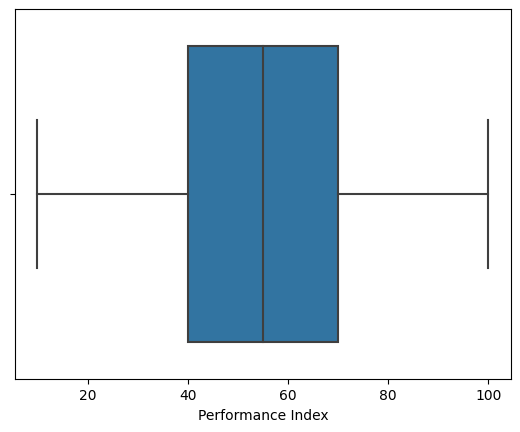

In [37]:
sns.boxplot(x=student['Performance Index'])

<Axes: xlabel='Previous Scores'>

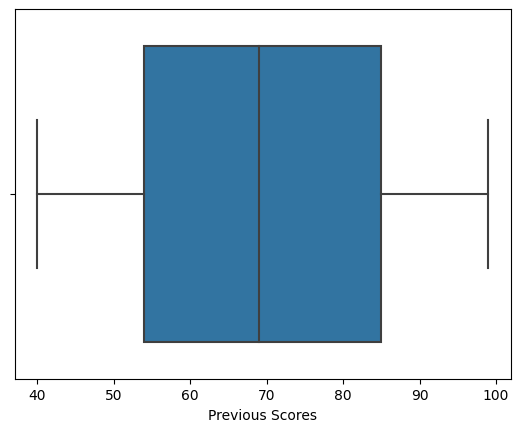

In [38]:
sns.boxplot(x=student['Previous Scores'])

<Axes: xlabel='Hours Studied'>

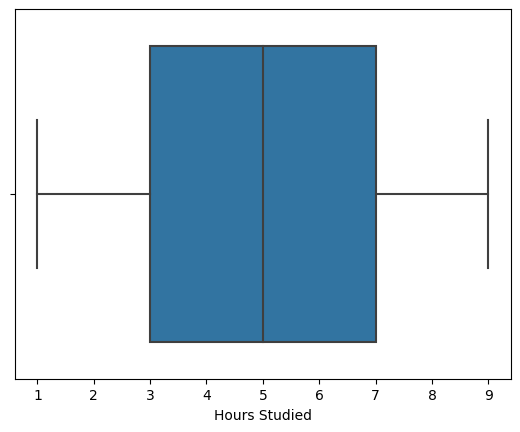

In [39]:
sns.boxplot(x=student['Hours Studied'])

In [40]:
columns_to_encode = ['Extracurricular Activities']

#Create the LabelEncoder object
label_encoder = LabelEncoder()

#Iterate over each column in the list and encode the values
for col in columns_to_encode:
    student[col] = label_encoder.fit_transform(student[col])

#Display the updated DataFrame
student.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


<Axes: >

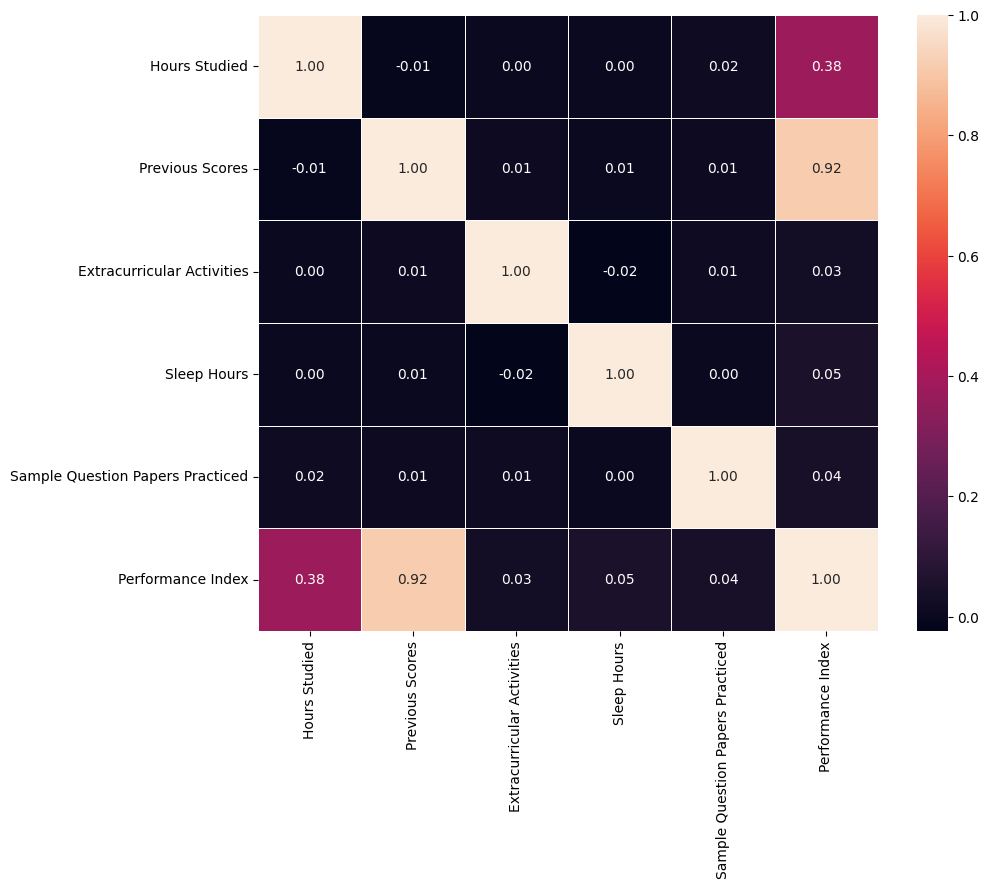

In [41]:
correlation_matrix = student.corr()

#Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as per your preference
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)

In [42]:
X = student[['Hours Studied','Previous Scores','Extracurricular Activities','Sleep Hours','Sample Question Papers Practiced']]
y = student['Performance Index']

In [43]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# # Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [46]:
X_train.shape[1]

5

In [47]:
from tensorflow.keras.layers import Dropout

model=Sequential()

model.add(Dense(300,activation='relu',input_shape=([5,])))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1))

In [48]:
model.compile(optimizer='Adam',loss='mse',metrics=['mae'])

In [49]:
model.fit(X_train,y_train,epochs=20)

Epoch 1/20
247/247 [==============================] - 2s 2ms/step - loss: 129.3555 - mae: 7.6249
Epoch 2/20
247/247 [==============================] - 1s 3ms/step - loss: 32.2425 - mae: 4.5739
Epoch 3/20
247/247 [==============================] - 1s 3ms/step - loss: 26.1140 - mae: 4.1144
Epoch 4/20
247/247 [==============================] - 1s 3ms/step - loss: 20.5390 - mae: 3.6504
Epoch 5/20
247/247 [==============================] - 1s 3ms/step - loss: 14.2907 - mae: 3.0227
Epoch 6/20
247/247 [==============================] - 1s 3ms/step - loss: 7.9350 - mae: 2.2335
Epoch 7/20
247/247 [==============================] - 1s 3ms/step - loss: 5.9129 - mae: 1.9350
Epoch 8/20
247/247 [==============================] - 1s 3ms/step - loss: 4.8955 - mae: 1.7603
Epoch 9/20
247/247 [==============================] - 1s 3ms/step - loss: 5.0010 - mae: 1.7879
Epoch 10/20
247/247 [==============================] - 0s 2ms/step - loss: 5.2163 - mae: 1.8227
Epoch 11/20
247/247 [======================

In [50]:
mse, mae = model.evaluate(X_test, y_test)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

62/62 [==============================] - 0s 2ms/step - loss: 4.6085 - mae: 1.7006
Mean Squared Error: 4.608480930328369
Mean Absolute Error: 1.700579285621643


In [51]:
y_pred = model.predict(X_test)
y_pred

62/62 [==============================] - 0s 1ms/step


array([[46.382202],
       [79.78401 ],
       [60.71981 ],
       ...,
       [76.359436],
       [85.44594 ],
       [35.54985 ]], dtype=float32)

In [52]:
df={'y_train':y_test,
    "y_pred":y_pred}

In [53]:
df

{'y_train': 6099    47.0
 106     76.0
 9265    62.0
 4707    23.0
 2155    76.0
         ... 
 8732    19.0
 3112    39.0
 5297    77.0
 6116    88.0
 5088    34.0
 Name: Performance Index, Length: 1975, dtype: float64,
 'y_pred': array([[46.382202],
        [79.78401 ],
        [60.71981 ],
        ...,
        [76.359436],
        [85.44594 ],
        [35.54985 ]], dtype=float32)}

In [54]:
#model.get_weights()

In [56]:
student


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [62]:
ff = [[7,74,0,8,1]]

In [63]:
pred = model.predict(ff)

1/1 [==============================] - 0s 36ms/step


In [64]:
pred

array([[64.91651]], dtype=float32)